In [31]:
# opencv-python 이 깔려있지 않다면 pip install opencv-python을 통해 설치하시면 됩니다.
# 이미지 파일을 읽어들여 리스트로 묶어줄 라이브러리입니다.
import glob

In [32]:
import numpy as np 
# cv2또한 이미지처리 라이브러리입니다. 만약 파이썬에 깔려있지 않다면 pip install cv2 를 통해 cmd에서 다운로드합니다.
import cv2 

In [33]:
# PIL도 파이썬의 이미지처리 라이브러리입니다. 마찬가지로 깔려있지 않다면 pip install PIL 혹은 pip install pillow 를 통해 다운로드합니다.
from PIL import Image 

In [34]:
import PIL.Image as pilimg
import numpy as np

In [35]:
# glob를 통해 jpg 형식의 파일을 읽어오고,img객체에 이미지 파일을 넣고 pix배열에 저장합니다.
# 출력된 사진파일명 중에서 가장 아래에 있는 사진으로 작업을 진행합니다.
for filename in glob.glob('*.jpg'):
    print(filename)
pix = np.array(Image.open(filename))

10%.jpg
cam.jpg
fwrm_003M_2020-04-13-10-00_cam04-1.jpg
fwrm_003M_2020-04-14-17-00_cam04-1.jpg


In [36]:
#쥬피터노트북 내부에서 이미지를 확인을 위한 라이브러리
import matplotlib.pyplot as plt

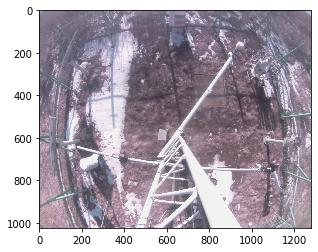

In [37]:
#이미지파일의 하늘 색상(640,10) 좌표의 하늘 RGB값을 통해 전체 명도를 조정합니다.
#우선 (640,10)의 pixel값을 획득 후, g 값으로 조정하였습니다.
im = Image.open(filename)
rgb_im = im.convert('RGB') # RGB모드로 변환.
plt.imshow(rgb_im) # 그레이스케일 이미지 확인        
r,g,b = rgb_im.getpixel((5,5))           
rgb_im = rgb_im.crop((200, 140, 1040, 1024)) #이미지 자르기
rgb_im.save('cam.jpg') #자른 이미지를 cam.jpg라는 파일명으로 저장합니다.

In [38]:
# 밝게하기(최대 255)
# if문을 써서 B값 구간을 나눈 이유는 (500,500)의 픽셀값을 모두 맞춘다고 해도 그때마다 밝기 차이가 있어서 이에 따른 적당한 
# 변수 조정이 필요합니다. 이 부분은 직접 파일을 확인하고 직접 값을 조정해야합니다.
# 일반적으로 화면이 흐릴수록 상대적으로 더 많이 밝기값을 올려주어야 합니다.
image = cv2.imread('cam.jpg') # 아까 저장한 cam.jpg 파일을 불러옵니다.
if 145 <= g < 165 :
    M = np.ones(image.shape, dtype = "uint8") * (200-g) # 200-g 값만큼 명도를 밝게해줍니다. 변수조정 필요
    added = cv2.add(image, M)
    cv2.imshow("Test Image", added)
    cv2.destroyAllWindows()
    cv2.imwrite('test.png', added)
    gray_img = Image.open("test.png").convert("LA")
elif 125 <= g < 145 :
    M = np.ones(image.shape, dtype = "uint8") * (190-g) # 변수조정 필요 
    added = cv2.add(image, M)
    cv2.imshow("Test Image", added)
    cv2.destroyAllWindows()
    cv2.imwrite('test.png', added)
    gray_img = Image.open("test.png").convert("LA")
elif 105 <= g < 125 :
    M = np.ones(image.shape, dtype = "uint8") * (180-g) # 변수조정 필요
    added = cv2.add(image, M)
    cv2.imshow("Test Image", added)
    cv2.destroyAllWindows()
    cv2.imwrite('test.png', added)
    gray_img = Image.open("test.png").convert("LA")
elif 85 <= g < 105 :
    M = np.ones(image.shape, dtype = "uint8") * (170-g) # 변수조정 필요
    added = cv2.add(image, M)
    cv2.imshow("Test Image", added)
    cv2.destroyAllWindows()
    cv2.imwrite('test.png', added)
    gray_img = Image.open("test.png").convert("LA")
elif 65 <= g < 85 :
    M = np.ones(image.shape, dtype = "uint8") * (160-g) # 변수조정 필요
    added = cv2.add(image, M)
    cv2.imshow("Test Image", added)
    cv2.destroyAllWindows()
    cv2.imwrite('test.png', added)
    gray_img = Image.open("test.png").convert("LA")

# B 값이 65 이하일 경우가 있으면 elif문으로 또 변수를 조정해주어야 합니다.
# 예시에 가장 낮은 B값은 90정도여서 예외처리는 65까지만 하였습니다.
# 사진파일을 확인하고 아래에서 변수도 조정 해봤는데도 눈을 제대로 식별하지 못한다면 명도의 문제이므로
# 변수조정 필요 부분을 조정해주시면 됩니다.
else :
    M = np.ones(image.shape, dtype = "uint8")  # 변수조정 필요
    added = cv2.add(image, M)
    cv2.imshow("Test Image", added)
    cv2.destroyAllWindows()
    cv2.imwrite('test.png', added)
    gray_img = Image.open("test.png").convert("LA")

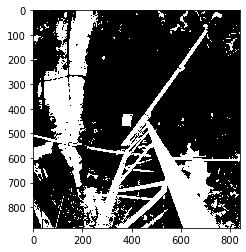

In [39]:
row = gray_img.size[0]
col = gray_img.size[1]
thr_img = Image.new("1", (row, col))#새 이진 이미지를 생성.
for x in range(1 , row):
    for y in range(1, col):
        if gray_img.getpixel((x,y))[0] > 175:# R값이 175 초과이면 흰색,이하이면 검은색으로 변환합니다.
            thr_img.putpixel((x,y),1)        # 그레이스케일으로 눈을 제대로 식별하지 못하면 이 부분을 첫번째로 수정하셔야합니다.
        else:
            thr_img.putpixel((x,y),0)
%matplotlib inline
plt.imshow(thr_img) # 그레이스케일 이미지 확인
thr_img.save("./TransparentImage.png")  #이진 이미지를 png형식의 그레이스케일 이미지로 저장.           

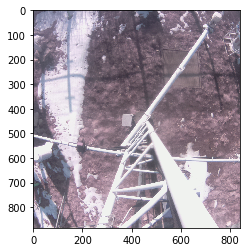

In [40]:
#잘린 사진 확인
#이 화면을 통해 위의 그레이스케일 이미지와 눈이 적절히 분리되었는지 확인합니다.
#사진을 자른 이유는 울타리 내부에서만 적설비율을 확인하기 위해서입니다.
plt.imshow(rgb_im)

In [41]:
# 이미지 객체로 생성
im = Image.open("./TransparentImage.png") 

# RGB 모드로 변경 
rgb_im = im.convert('RGB')

#for문을 통해 row*col 크기의 이미지에서 흰색 픽셀 수의 개수를 count 합니다.
count = 0;
for i in range(1, row): # 1280 = X축 좌표
    for j in range(1,col): # 1024 = y축 좌표
        r = thr_img.getpixel((i,j)) 
        if r == 1 :
            count += 1;

# round는 소수점 2째자리까지 출력해주며, 수식은 전체 row*col개의 픽셀중 흰 픽셀(count)값에서 
# 땅에서 눈에 덮힌 부분 픽셀수를 땅 전체 픽셀수(row*col)로 나눕니다.
print('{}%'.format(round(((count)/(row*col))*100,2)))
# 흰색 픽셀수 / 전체 픽셀수 입니다.

27.31%
